## Importing libraries

In [1]:
%pip install powerlaw

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.stats import lognorm

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [2]:
df = pd.read_csv('Patenting_Trends Filled vs Granted.csv')
df.head(10)

,Patenting Trends,Applications Filed,Grant Published
0,2025,12715,5656
1,2024,101584,64963
2,2023,100985,76039
3,2022,90890,30563
4,2021,74849,30227
5,2020,62833,25897
6,2019,62165,23567
7,2018,55592,13883
8,2017,52436,12334
9,2016,50160,7905


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Patenting Trends    36 non-null     int64
 1   Applications Filed  36 non-null     int64
 2   Grant Published     36 non-null     int64
dtypes: int64(3)
memory usage: 996.0 bytes


In [3]:
df.isnull()

,Patenting Trends,Applications Filed,Grant Published
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


## Display

### Emperical distribution

In [6]:
# Calculate the total citations across all years for each domain
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Calculate the cumulative distribution
df['Cumulative Distribution'] = df['Total'].cumsum() / df['Total'].sum()

# Display the updated dataset
df[['Patenting Trends', 'Total', 'Cumulative Distribution']].head()

,Patenting Trends,Total,Cumulative Distribution
0,2025,36742.011812,0.011812
1,2024,333094.118895,0.118894
2,2023,354048.232714,0.232713
3,2022,242906.310804,0.310801
4,2021,210152.378364,0.378361


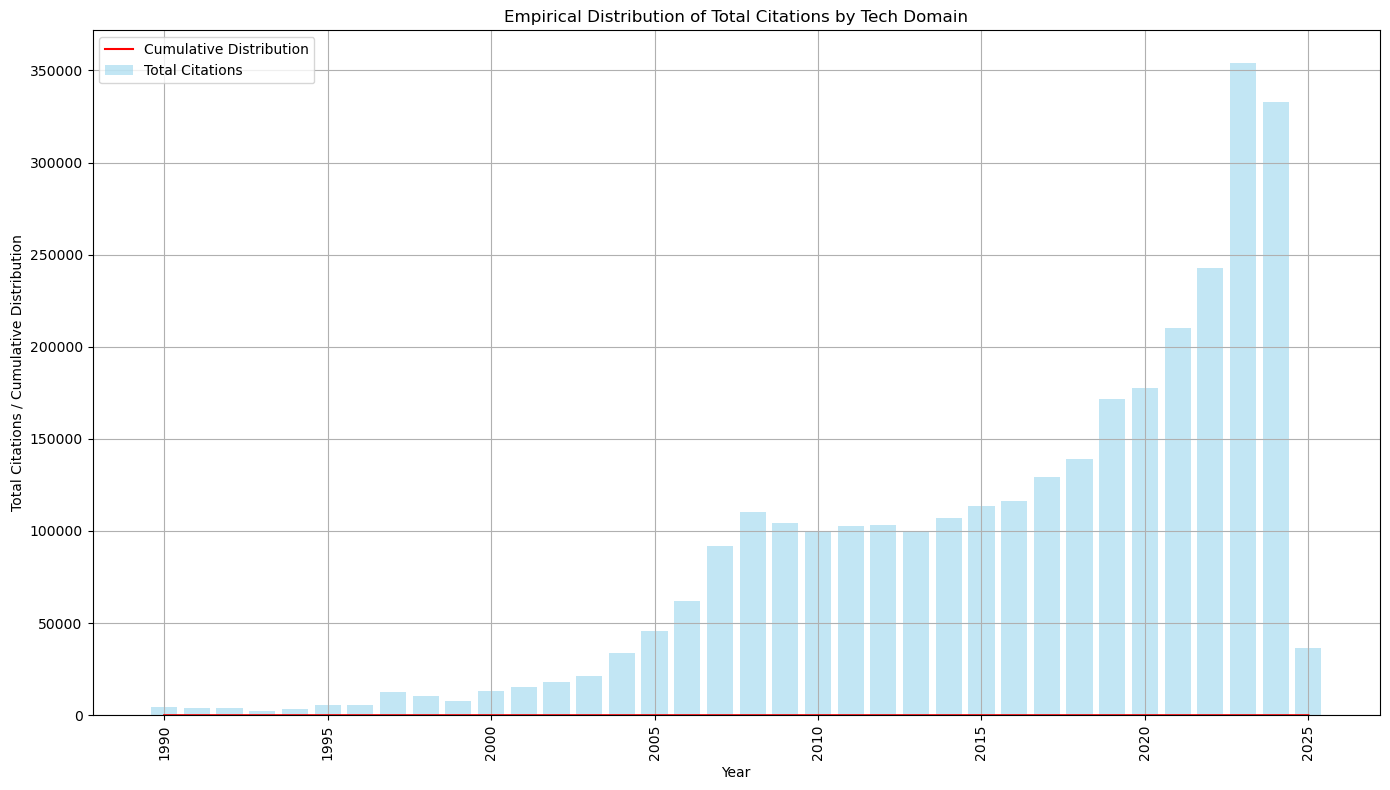

In [7]:
# Plot the empirical distributions for the tech domains
plt.figure(figsize=(14, 8))

# Bar plot for Total citations
plt.bar(df['Patenting Trends'], 
        df['Total'], alpha=0.5, label='Total Citations', color='skyblue')

# Line plot for Cumulative Distribution
plt.plot(df['Patenting Trends'], 
         df['Cumulative Distribution'], 'r-', label='Cumulative Distribution')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Citations / Cumulative Distribution')
plt.title('Empirical Distribution of Total Citations by Tech Domain')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Lognormal fit

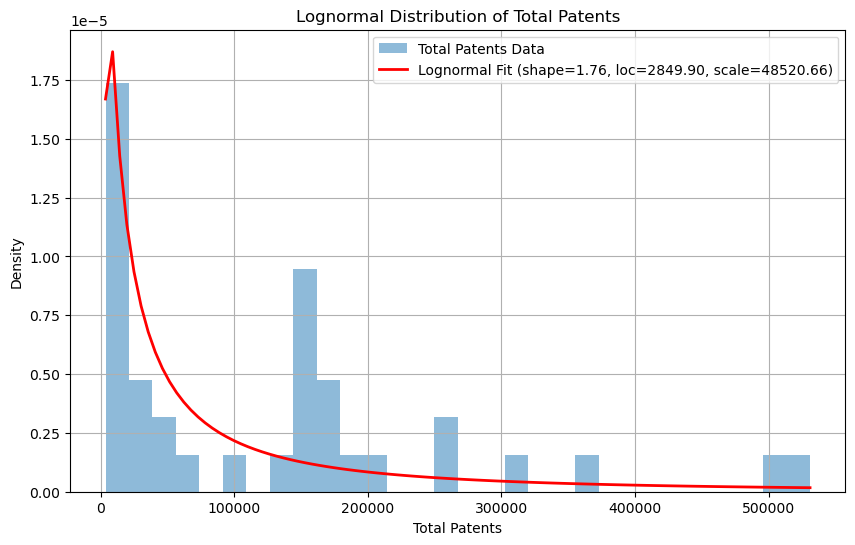

In [8]:
# Calculate the total patents per year for each company
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Fit a lognormal distribution to the total patents
total_patents = df['Total']
shape, loc, scale = lognorm.fit(total_patents)
x = np.linspace(min(total_patents), max(total_patents), 100)
pdf_fitted = lognorm.pdf(x, shape, loc, scale)

# Plot the lognormal distribution
plt.figure(figsize=(10, 6))
plt.hist(total_patents, bins=30, density=True, alpha=0.5, label='Total Patents Data')
plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'Lognormal Fit (shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f})')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Lognormal Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()

### Power law fit

Calculating best minimal value for power law fit


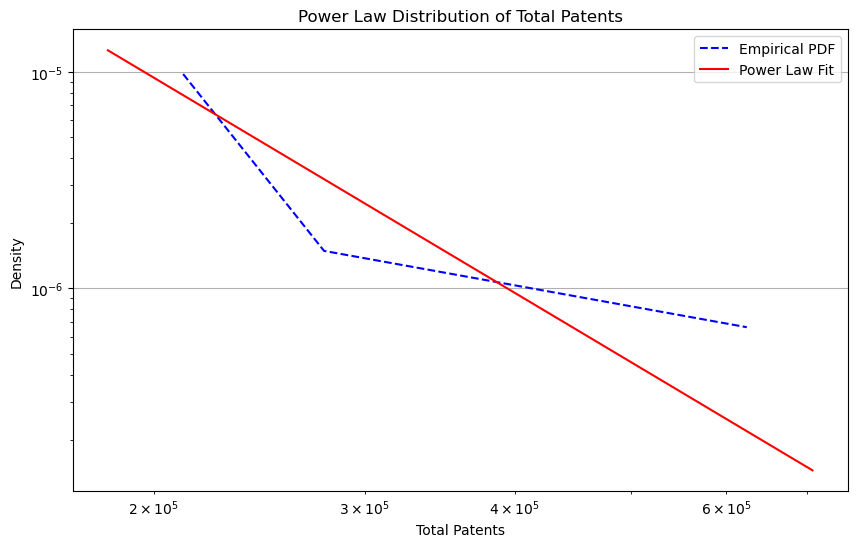

In [9]:
df['Total'] = df.iloc[:, 1:].sum(axis=1)
total_patents = df['Total']

# Fit a power law distribution to the total patents
fit = powerlaw.Fit(total_patents)

# Plot the power law distribution
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linestyle='--', label='Empirical PDF')
fit.power_law.plot_pdf(color='r', label='Power Law Fit')
plt.xlabel('Total Patents')
plt.ylabel('Density')
plt.title('Power Law Distribution of Total Patents')
plt.legend()
plt.grid(True)
plt.show()

### Pareto distribution

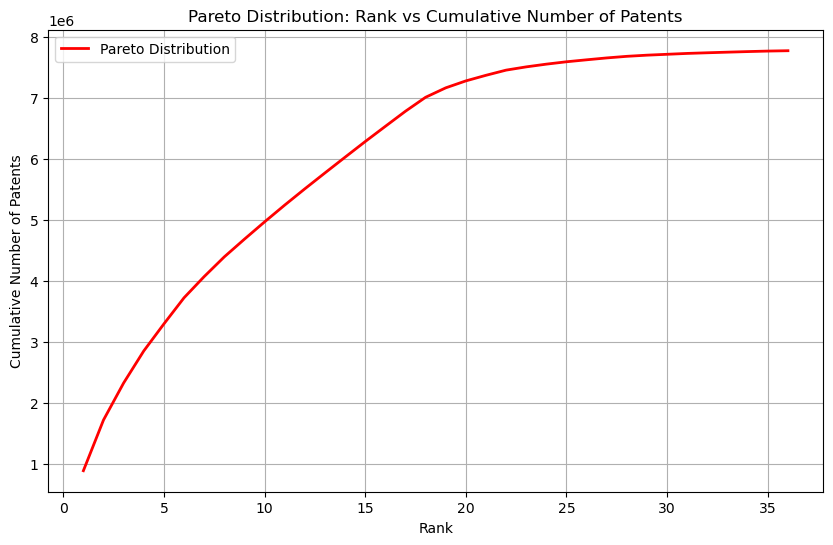

In [10]:
# Calculate the total patents across all years for each industry
df['Total'] = df.iloc[:, 1:].sum(axis=1)

# Sort industries by total patents in descending order
data_sorted = df.sort_values(by='Total', ascending=False)

# Calculate cumulative number of patents
data_sorted['Cumulative Patents'] = data_sorted['Total'].cumsum()

# Add rank column
data_sorted['Rank'] = np.arange(1, len(data_sorted) + 1)

# Pareto distribution: Rank vs Cumulative Patents
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['Rank'], data_sorted['Cumulative Patents'], 'r-', lw=2, label='Pareto Distribution')
plt.xlabel('Rank')
plt.ylabel('Cumulative Number of Patents')
plt.title('Pareto Distribution: Rank vs Cumulative Number of Patents')
plt.legend()
plt.grid(True)
plt.show()